In [328]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()


,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [329]:
troca = {0:1,1:0}
dados['finished'] = dados.unfinished.map(troca)

x = dados[['expected_hours','price']]
y = dados['finished']

<AxesSubplot: xlabel='expected_hours', ylabel='price'>

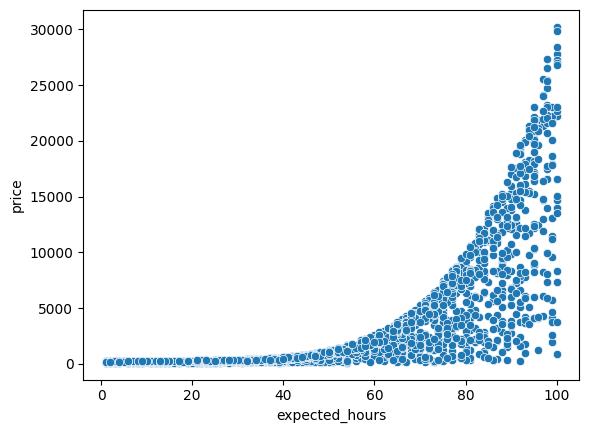

In [330]:
import seaborn as sns

sns.scatterplot(x='expected_hours',y='price',data=dados)

<AxesSubplot: xlabel='expected_hours', ylabel='price'>

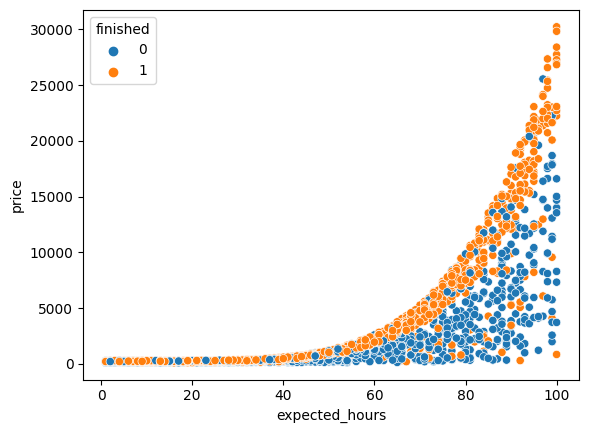

In [331]:
sns.scatterplot(x='expected_hours',y='price',hue='finished',data=dados)

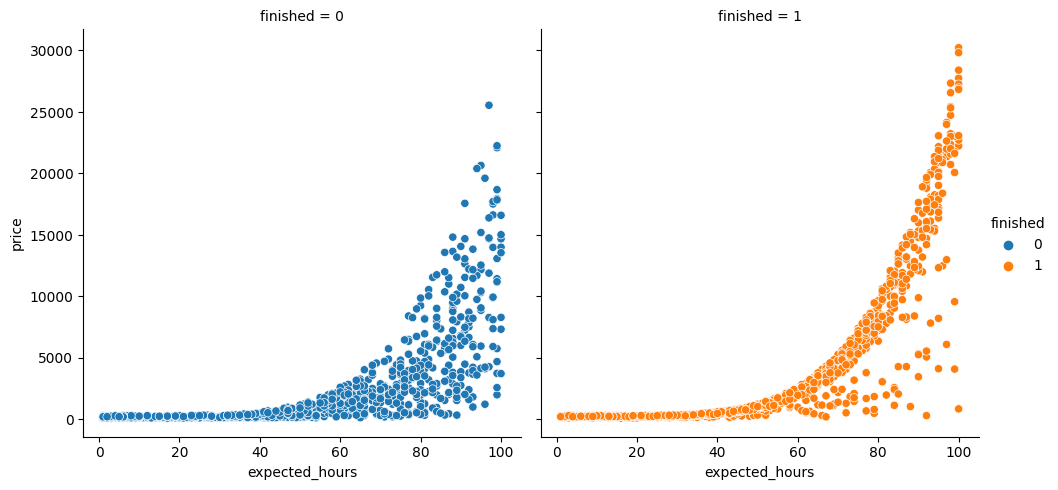

In [332]:
sns.relplot(x='expected_hours',y='price',hue='finished',col='finished',data=dados)

In [333]:
seed = 42
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25,stratify=y)

In [334]:
from sklearn.svm import LinearSVC

modelo = LinearSVC()
modelo.fit(X_train,y_train)
previsoes = modelo.predict(X_test)
print(f'Acurácia do modelo: {round(accuracy_score(y_test,previsoes),3)*100}%')

Acurácia do modelo: 57.599999999999994%


C:\Users\dmm\Documents\pythonBookProject\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [335]:
y_train.value_counts()

1    850
0    767
Name: finished, dtype: int64

In [336]:
y_test.value_counts()

1    284
0    256
Name: finished, dtype: int64

In [337]:
base_line = np.ones(len(y_test))
print(f'Acurácia de baseline: {round(accuracy_score(y_test,base_line)*100,2)}%')

Acurácia de baseline: 52.59%


<AxesSubplot: xlabel='expected_hours', ylabel='price'>

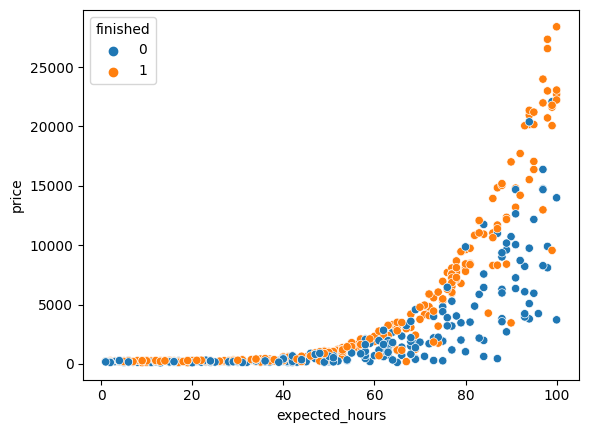

In [338]:
sns.scatterplot(x='expected_hours',y='price',hue=y_test,data=X_test)

<AxesSubplot: xlabel='expected_hours', ylabel='price'>

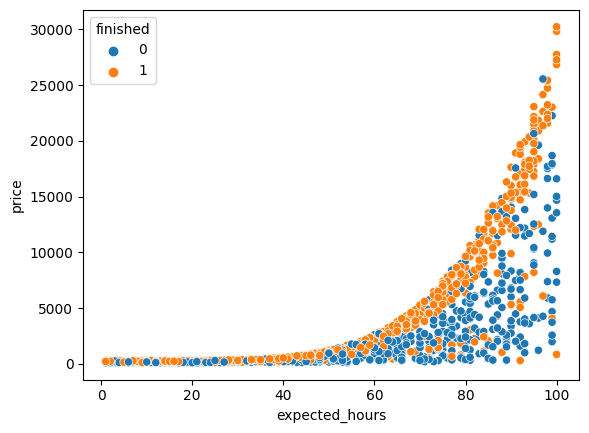

In [339]:
sns.scatterplot(x='expected_hours',y='price',hue=y_train,data=X_train)

In [340]:
x_min = X_test.expected_hours.min()
x_max = X_test.expected_hours.max()
y_min = X_test.price.min()
y_max = X_test.price.max()

In [341]:
pixels = 100
x_axis = np.arange(x_min, x_max, (x_max - x_min)/pixels)
y_axis = np.arange(y_min, y_max, (y_max - y_min)/pixels)
xx, yy = np.meshgrid(x_axis,y_axis)
pontos = np.c_[xx.ravel(),yy.ravel()]

In [342]:
z = modelo.predict(pontos)
z = z.reshape(xx.shape)

C:\Users\dmm\Documents\pythonBookProject\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


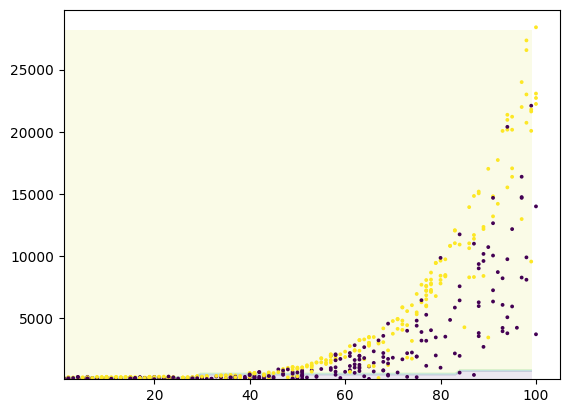

In [343]:
plt.contourf(xx,yy,z, alpha = 0.1)
plt.scatter(X_test.expected_hours,X_test.price,c=y_test, s=3)